<a href="https://colab.research.google.com/github/tracy2811/DataScience-Projects/blob/master/StudentEvaluation/StudentEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Turkiye Student Evaluation](http://archive.ics.uci.edu/ml/datasets/turkiye+student+evaluation)

Q1-12: course

Q13-28: instructor

[Guide](https://www.kaggle.com/yatishbn/clustering-use-case-using-turkey-student-data)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd /content/drive/My\ Drive/Colab\ Notebooks/StudentEvaluation

/content/drive/My Drive/Colab Notebooks/StudentEvaluation


In [4]:
import pandas as pd
df = pd.read_csv('turkiye-student-evaluation_generic.csv')
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [5]:
df.shape

(5820, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 33 columns):
instr         5820 non-null int64
class         5820 non-null int64
nb.repeat     5820 non-null int64
attendance    5820 non-null int64
difficulty    5820 non-null int64
Q1            5820 non-null int64
Q2            5820 non-null int64
Q3            5820 non-null int64
Q4            5820 non-null int64
Q5            5820 non-null int64
Q6            5820 non-null int64
Q7            5820 non-null int64
Q8            5820 non-null int64
Q9            5820 non-null int64
Q10           5820 non-null int64
Q11           5820 non-null int64
Q12           5820 non-null int64
Q13           5820 non-null int64
Q14           5820 non-null int64
Q15           5820 non-null int64
Q16           5820 non-null int64
Q17           5820 non-null int64
Q18           5820 non-null int64
Q19           5820 non-null int64
Q20           5820 non-null int64
Q21           5820 non-null int64
Q22      

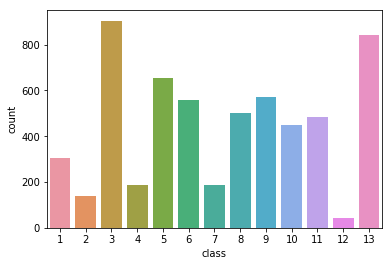

In [7]:
import seaborn as sns

sns.countplot(x='class', data=df)

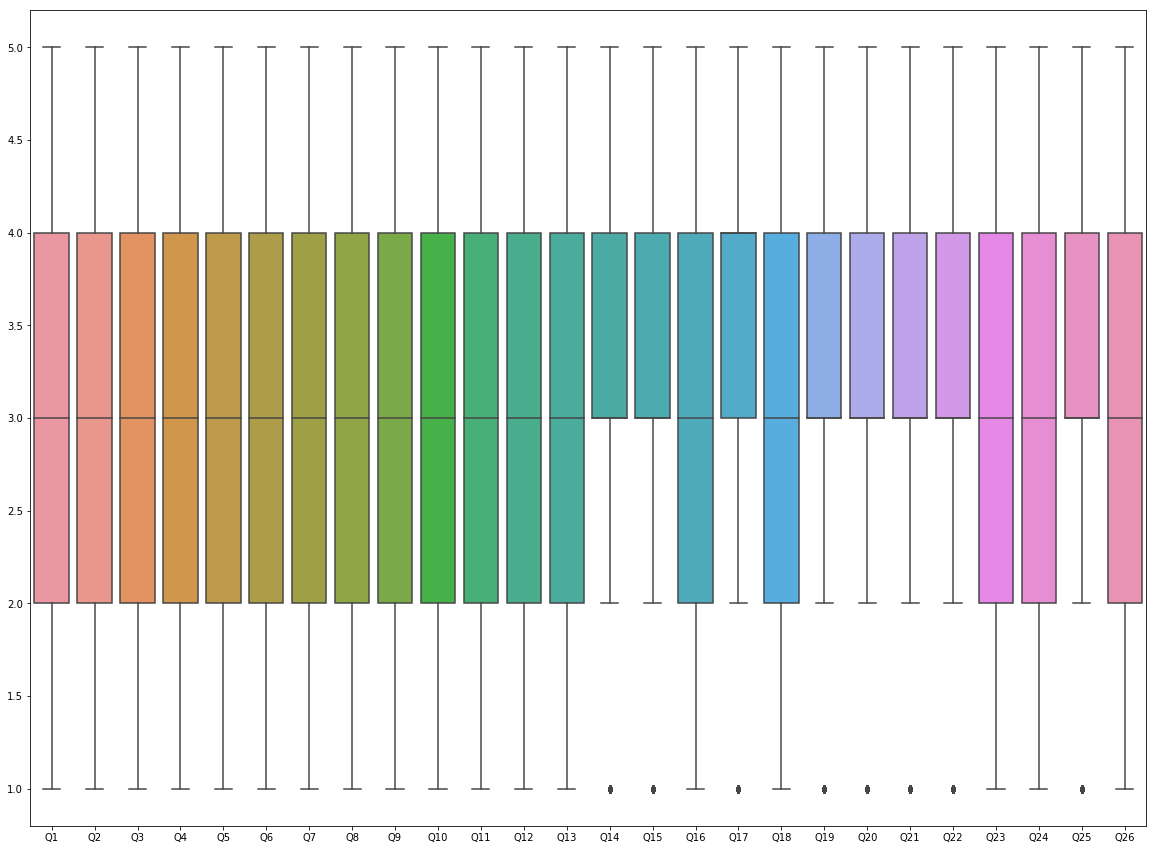

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
sns.boxplot(data=df.iloc[:,5:31 ])

## Classes

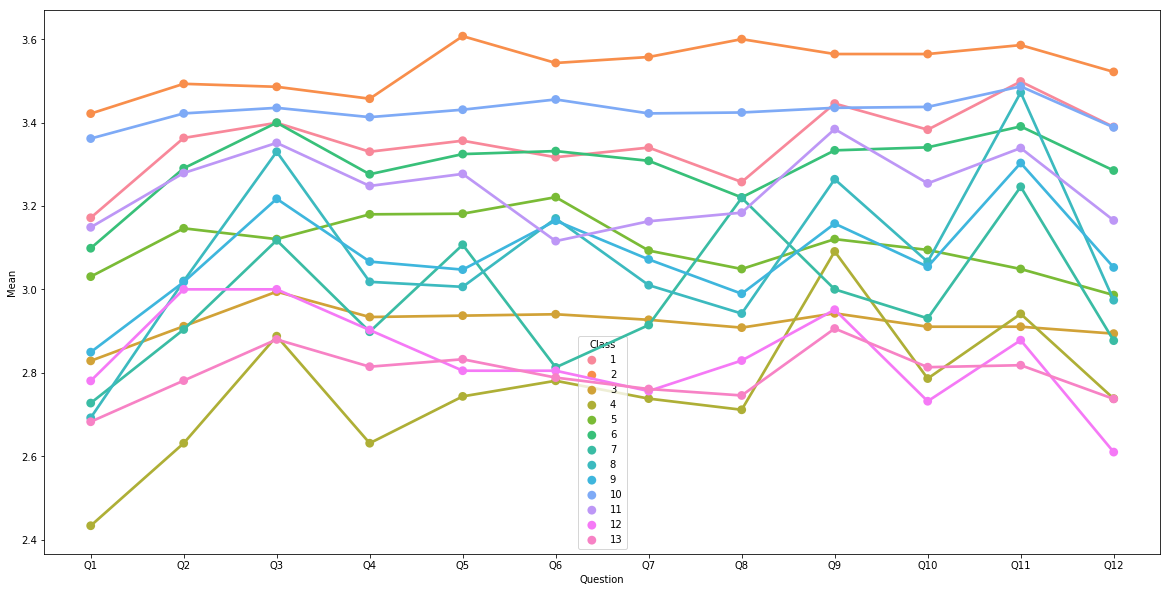

In [22]:
classes=[]
questions=[]
means=[]

for c in range(1,14):
  for q in df.columns[5:17]:
    classes.append(c)
    questions.append(q)
    means.append(df.loc[df['class']==c,q].mean())
    
instr_df = pd.DataFrame({'Class':classes, 'Question':questions,'Mean':means})

plt.figure(figsize=(20,10))
sns.pointplot(x='Question',y='Mean',data=instr_df,hue='Class')

## Instructor

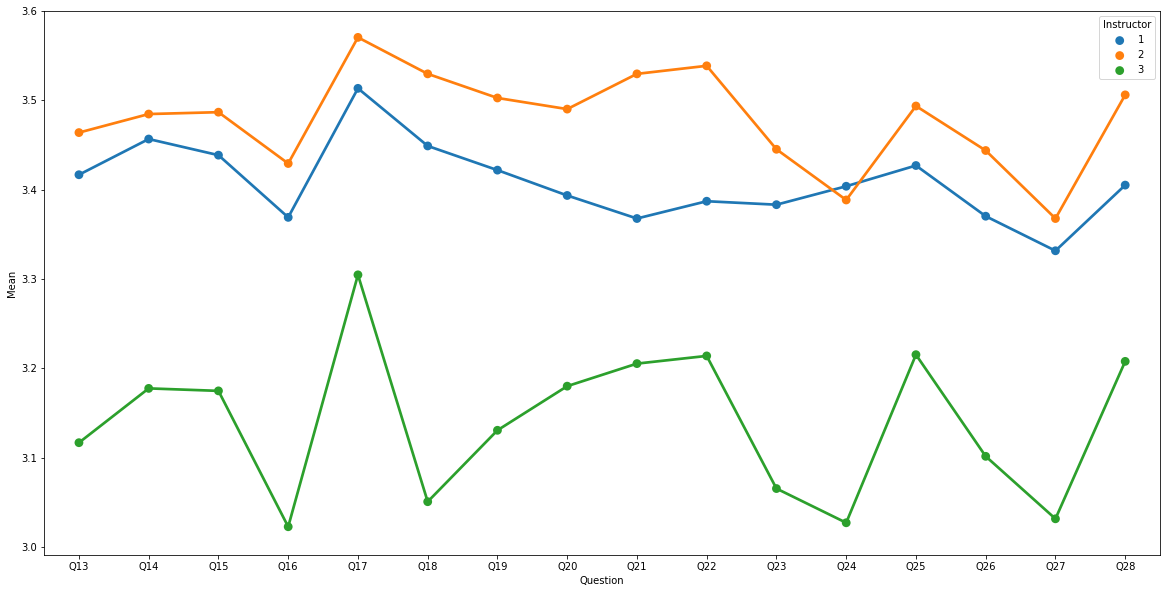

In [24]:
instructors=[]
iquestions=[]
imeans=[]

for i in df['instr'].unique():
  for q in df.columns[17:]:
    instructors.append(i)
    iquestions.append(q)
    imeans.append(df.loc[df['instr']==i,q].mean())
    
class_df = pd.DataFrame({'Instructor':instructors,
                         'Question':iquestions,
                         'Mean':imeans})

plt.figure(figsize=(20,10))
sns.pointplot(x='Question',y='Mean',data=class_df,hue='Instructor')

Instructor 3 has the lowest rating in comparision to others. 

Text(0.5, 1.0, 'Evaluation for Instructor 3')

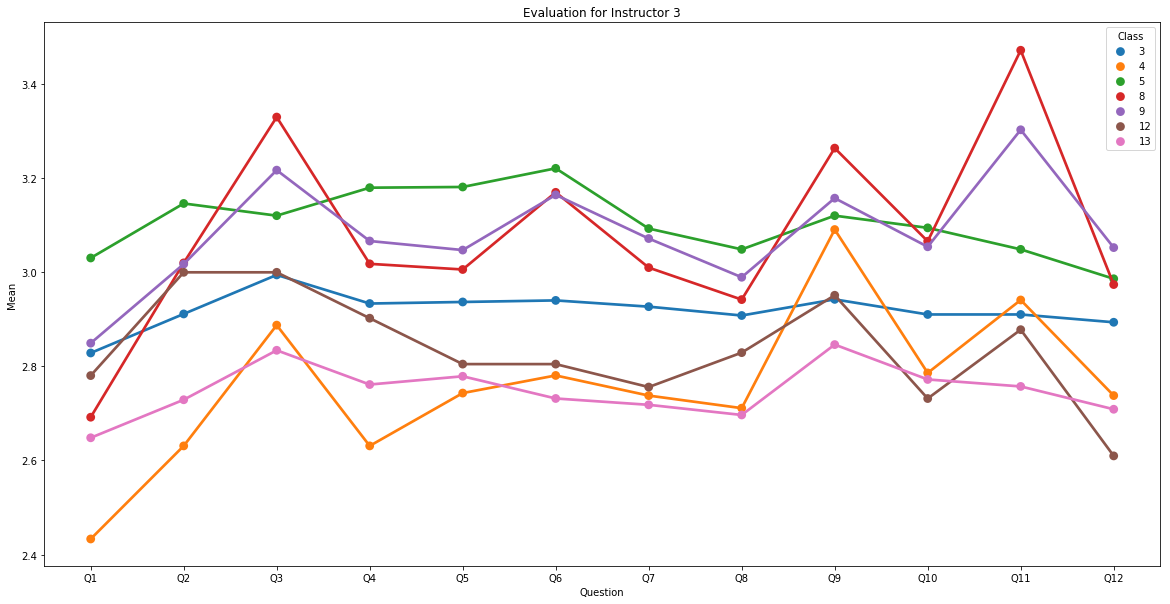

In [31]:
classes3=[]
questions3=[]
means3=[]

instr3 = df.loc[df['instr']==3,:]
for c in instr3['class'].unique():
  for q in instr3.columns[5:17]:
    classes3.append(c)
    questions3.append(q)
    means3.append(instr3.loc[instr3['class']==c,q].mean())
    
instr3_df = pd.DataFrame({'Class':classes3, 'Question':questions3,'Mean':means3})

plt.figure(figsize=(20,10))
ax = sns.pointplot(x='Question',y='Mean',data=instr3_df,hue='Class')
ax.set_title('Evaluation for Instructor 3')